https://nicharuc.github.io/topic_modeling/

https://towardsdatascience.com/6-tips-to-optimize-an-nlp-topic-model-for-interpretability-20742f3047e2

https://towardsdatascience.com/nlp-for-topic-modeling-summarization-of-legal-documents-8c89393b1534

# Imports

In [1]:
%pip install pyLDAvis

  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Using cached sklearn-0.0.tar.gz (1.1 kB)
     |████████████████████████████████| 11.2 MB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 17.6 MB 427 kB/s eta 0:00:01     |██████████████████              | 10.0 MB 391 kB/s eta 0:00:20
  Using cached funcy-1.17-py2.py3-none-any.whl (33 kB)
     |████████████████████████████████| 24.0 MB 4.1 MB/s eta 0:00:01     |██████████████████████████████▎ | 22.7 MB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 3.7 MB/s eta 0:00:01
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=9048d8ffe1a1b2c4de0971baf0a32b51a86073c0b6f1fbb0665868fec4118f38
  Stored in directory: /Users/mayar/Library/Caches/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa5931

In [2]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install mglearn

  Using cached mglearn-0.1.9.tar.gz (540 kB)
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=f9d725e2d64be3ae3612cd789195eb236abd66ddf1fa75ef659e9567e5a37d0d
  Stored in directory: /Users/mayar/Library/Caches/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt
import json
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
import re
from datetime import datetime
from gensim import corpora
import gensim
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import _stop_words
import pandas as pd
import numpy as np

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:164: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  

In [5]:
%pylab

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [6]:
%matplotlib inline

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Definitions

In [7]:
covid_dict = ["6 feet apart", "6' apart", "asymptomatic", "community spread", 
            "confirmed positive case", "confirmed positive cases", 
            "contact trace", "contact traced", "contact tracing", "coronavirus", 
            "COVID", "COVID-19", "COVID19", "distance learning", "endemic", 
            "epidemic", "face covering", "face coverings", "facemask", "facemasks", 
            "flatten the curve", "flattened the curve", "flattening the curve", 
            "herd immunity", "hybrid classes", "hybrid instruction", "hybrid learning", 
            "hybrid semester", "hybrid semester", "hybrid teaching", 
            "in person classes", "in person courses", "in person intruction", 
            "in person learning", "in person school", "in person semester", 
            "in person teaching", "in-person classes", "in-person courses", 
            "in-person intruction", "in-person learning", "in-person school", 
            "in-person semester", "in-person teaching", "isolation", 
            "learning at home", "learning from home", "learning online", 
            "learning remotely", "lockdown ", "mask", "mask mandate", 
            "mask required", "masks required", "nasal swab", "online classes", 
            "online courses", "online instruction", "online learning", 
            "online school", "online semester", "online teaching", "outbreak", 
            "pandemic", "physical distance", "physical distancing", 
            "physically distanced", "physically distancing", "PPE", 
            "quarantine", "quarantining", "rapid test", "remote coursework", 
            "remote instruction", "remote learning", "remote semester", 
            "remote teaching", "return to learn", "return to the classroom", 
            "safety protocols", "SARS-CoV-2", "self-isolation", "self-monitoring", 
            "shelter-in-place", "six feet apart", "social distance", 
            "social distancing", "social isolation", "socially distanced", 
            "socially distant", "spit test", "symptomatic", "teaching remotely", 
            "transmission", "transmit", "vaccinate", "vaccinated", "vaccination", 
            "vaccine", "vax", "vaxination", "vaxine", "vaxx", "vaxxination", 
            "vaxxine", "ventilator", "virtual instruction", "virtual learning", 
            "virtual semester", "work from home", "working at home", 
            "working from home", "working remotely", "zoom classes", 
            "zoom coursework", "zoom instruction", "zoom learning", "zoom semester"]
covid_keywords = '|'.join(covid_dict)

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
online_s = ["HarvardNC.csv", "DartmouthNC.csv", "UnivPennsylvaniaNC.csv", "clemsonunivNC.csv", "spartans.msuNC.csv", "universityofutahNC.csv", "StanfordNC.csv", "UCSanDiegoNC.csv", "UofWANC.csv", "KStateNC.csv", "UTAustinTXNC.csv", "NYUNC.csv", "PrincetonUNC.csv", "cuboulderNC.csv", "UCDavisNC.csv", "MITnewsNC.csv", "PurdueUniversityNC.csv", "universityoforegonNC.csv", "uarizonaNC.csv", "RITfbNC.csv"]
hybrid_s = ["UniversityOfMichiganNC.csv", "arizonastateuniversityNC.csv","pennstateNC.csv",  "BYUNC.csv", "UTKnoxvilleNC.csv", "BostonCollegeNC.csv", "IowaStateUNC.csv", "illinois.eduNC.csv", "UConnNC.csv", "tamuNC.csv", "DukeUnivNC.csv", "UofMNNC.csv"]
in_person_s = ["notredameNC.csv", "universityofiowaNC.csv", "universityofalabamaNC.csv", "universityofgaNC.csv", "txstateuNC.csv", "georgiatechNC.csv", "auburnuNC.csv", "uofoklahomaNC.csv", "KUNC.csv", "msstateNC.csv", "olemissNC.csv", "BaylorUniversity1845NC.csv", "virginiatechNC.csv"]

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
stop_word_list = ['www','a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de', 'describe', 'detail', 'did', 'didn', 'do', 'does', 'doesn', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed', 'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'kg', 'km', 'last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made', 'make', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly', 'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine', 'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once', 'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'part', 'per', 'perhaps', 'please', 'put', 'quite', 'rather', 'rather', 're', 'really', 'regarding', 'same', 'say', 'see', 'seem', 'seemed', 'seeming', 'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system', 'take', 'ten', 'than', 'that', 'the', 'their', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thick', 'thin', 'third', 'this', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward', 'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'unless', 'until', 'up', 'upon', 'us', 'used', 'using', 'various', 'very', 'very', 'via', 'was', 'we', 'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself', 'yourselves']
english_names = ['aaren', 'aarika', 'abagael', 'abagail', 'abbe', 'abbey', 'abbi', 'abbie', 'abby', 'abbye', 'abigael', 'abigail', 'abigale', 'abra', 'ada', 'adah', 'adaline', 'adan', 'adara', 'adda', 'addi', 'addia', 'addie', 'addy', 'adel', 'adela', 'adelaida', 'adelaide', 'adele', 'adelheid', 'adelice', 'adelina', 'adelind', 'adeline', 'adella', 'adelle', 'adena', 'adey', 'adi', 'adiana', 'adina', 'adora', 'adore', 'adoree', 'adorne', 'adrea', 'adria', 'adriaens', 'adrian', 'adriana', 'adriane', 'adrianna', 'adrianne', 'adriena', 'adrienne', 'aeriel', 'aeriela', 'aeriell', 'afton', 'ag', 'agace', 'agata', 'agatha', 'agathe', 'aggi', 'aggie', 'aggy', 'agna', 'agnella', 'agnes', 'agnese', 'agnesse', 'agneta', 'agnola', 'agretha', 'aida', 'aidan', 'aigneis', 'aila', 'aile', 'ailee', 'aileen', 'ailene', 'ailey', 'aili', 'ailina', 'ailis', 'ailsun', 'ailyn', 'aime', 'aimee', 'aimil', 'aindrea', 'ainslee', 'ainsley', 'ainslie', 'ajay', 'alaine', 'alameda', 'alana', 'alanah', 'alane', 'alanna', 'alayne', 'alberta', 'albertina', 'albertine', 'albina', 'alecia', 'aleda', 'aleece', 'aleen', 'alejandra', 'alejandrina', 'alena', 'alene', 'alessandra', 'aleta', 'alethea', 'alex', 'alexa', 'alexandra', 'alexandrina', 'alexi', 'alexia', 'alexina', 'alexine', 'alexis', 'alfi', 'alfie', 'alfreda', 'alfy', 'ali', 'alia', 'alica', 'alice', 'alicea', 'alicia', 'alida', 'alidia', 'alie', 'alika', 'alikee', 'alina', 'aline', 'alis', 'alisa', 'alisha', 'alison', 'alissa', 'alisun', 'alix', 'aliza', 'alla', 'alleen', 'allegra', 'allene', 'alli', 'allianora', 'allie', 'allina', 'allis', 'allison', 'allissa', 'allix', 'allsun', 'allx', 'ally', 'allyce', 'allyn', 'allys', 'allyson', 'alma', 'almeda', 'almeria', 'almeta', 'almira', 'almire', 'aloise', 'aloisia', 'aloysia', 'alta', 'althea', 'alvera', 'alverta', 'alvina', 'alvinia', 'alvira', 'alyce', 'alyda', 'alys', 'alysa', 'alyse', 'alysia', 'alyson', 'alyss', 'alyssa', 'amabel', 'amabelle', 'amalea', 'amalee', 'amaleta', 'amalia', 'amalie', 'amalita', 'amalle', 'amanda', 'amandi', 'amandie', 'amandy', 'amara', 'amargo', 'amata', 'amber', 'amberly', 'ambur', 'ame', 'amelia', 'amelie', 'amelina', 'ameline', 'amelita', 'ami', 'amie', 'amii', 'amil', 'amitie', 'amity', 'ammamaria', 'amy', 'amye', 'ana', 'anabal', 'anabel', 'anabella', 'anabelle', 'analiese', 'analise', 'anallese', 'anallise', 'anastasia', 'anastasie', 'anastassia', 'anatola', 'andee', 'andeee', 'anderea', 'andi', 'andie', 'andra', 'andrea', 'andreana', 'andree', 'andrei', 'andria', 'andriana', 'andriette', 'andromache', 'andy', 'anestassia', 'anet', 'anett', 'anetta', 'anette', 'ange', 'angel', 'angela', 'angele', 'angelia', 'angelica', 'angelika', 'angelina', 'angeline', 'angelique', 'angelita', 'angelle', 'angie', 'angil', 'angy', 'ania', 'anica', 'anissa', 'anita', 'anitra', 'anjanette', 'anjela', 'ann', 'ann-marie', 'anna', 'anna-diana', 'anna-diane', 'anna-maria', 'annabal', 'annabel', 'annabela', 'annabell', 'annabella', 'annabelle', 'annadiana', 'annadiane', 'annalee', 'annaliese', 'annalise', 'annamaria', 'annamarie', 'anne', 'anne-corinne', 'anne-marie', 'annecorinne', 'anneliese', 'annelise', 'annemarie', 'annetta', 'annette', 'anni', 'annice', 'annie', 'annis', 'annissa', 'annmaria', 'annmarie', 'annnora', 'annora', 'anny', 'anselma', 'ansley', 'anstice', 'anthe', 'anthea', 'anthia', 'anthiathia', 'antoinette', 'antonella', 'antonetta', 'antonia', 'antonie', 'antonietta', 'antonina', 'anya', 'appolonia', 'april', 'aprilette', 'ara', 'arabel', 'arabela', 'arabele', 'arabella', 'arabelle', 'arda', 'ardath', 'ardeen', 'ardelia', 'ardelis', 'ardella', 'ardelle', 'arden', 'ardene', 'ardenia', 'ardine', 'ardis', 'ardisj', 'ardith', 'ardra', 'ardyce', 'ardys', 'ardyth', 'aretha', 'ariadne', 'ariana', 'aridatha', 'ariel', 'ariela', 'ariella', 'arielle', 'arlana', 'arlee', 'arleen', 'arlen', 'arlena', 'arlene', 'arleta', 'arlette', 'arleyne', 'arlie', 'arliene', 'arlina', 'arlinda', 'arline', 'arluene', 'arly', 'arlyn', 'arlyne', 'aryn', 'ashely', 'ashia', 'ashien', 'ashil', 'ashla', 'ashlan', 'ashlee', 'ashleigh', 'ashlen', 'ashley', 'ashli', 'ashlie', 'ashly', 'asia', 'astra', 'astrid', 'astrix', 'atalanta', 'athena', 'athene', 'atlanta', 'atlante', 'auberta', 'aubine', 'aubree', 'aubrette', 'aubrey', 'aubrie', 'aubry', 'audi', 'audie', 'audra', 'audre', 'audrey', 'audrie', 'audry', 'audrye', 'audy', 'augusta', 'auguste', 'augustina', 'augustine', 'aundrea', 'aura', 'aurea', 'aurel', 'aurelea', 'aurelia', 'aurelie', 'auria', 'aurie', 'aurilia', 'aurlie', 'auroora', 'aurora', 'aurore', 'austin', 'austina', 'austine', 'ava', 'aveline', 'averil', 'averyl', 'avie', 'avis', 'aviva', 'avivah', 'avril', 'avrit', 'ayn', 'bab', 'babara', 'babb', 'babbette', 'babbie', 'babette', 'babita', 'babs', 'bambi', 'bambie', 'bamby', 'barb', 'barbabra', 'barbara', 'barbara-anne', 'barbaraanne', 'barbe', 'barbee', 'barbette', 'barbey', 'barbi', 'barbie', 'barbra', 'barby', 'bari', 'barrie', 'barry', 'basia', 'bathsheba', 'batsheva', 'bea', 'beatrice', 'beatrisa', 'beatrix', 'beatriz', 'bebe', 'becca', 'becka', 'becki', 'beckie', 'becky', 'bee', 'beilul', 'beitris', 'bekki', 'bel', 'belia', 'belicia', 'belinda', 'belita', 'bell', 'bella', 'bellanca', 'belle', 'bellina', 'belva', 'belvia', 'bendite', 'benedetta', 'benedicta', 'benedikta', 'benetta', 'benita', 'benni', 'bennie', 'benny', 'benoite', 'berenice', 'beret', 'berget', 'berna', 'bernadene', 'bernadette', 'bernadina', 'bernadine', 'bernardina', 'bernardine', 'bernelle', 'bernete', 'bernetta', 'bernette', 'berni', 'bernice', 'bernie', 'bernita', 'berny', 'berri', 'berrie', 'berry', 'bert', 'berta', 'berte', 'bertha', 'berthe', 'berti', 'bertie', 'bertina', 'bertine', 'berty', 'beryl', 'beryle', 'bess', 'bessie', 'bessy', 'beth', 'bethanne', 'bethany', 'bethena', 'bethina', 'betsey', 'betsy', 'betta', 'bette', 'bette-ann', 'betteann', 'betteanne', 'betti', 'bettina', 'bettine', 'betty', 'bettye', 'beulah', 'bev', 'beverie', 'beverlee', 'beverley', 'beverlie', 'beverly', 'bevvy', 'bianca', 'bianka', 'bibbie', 'bibby', 'bibbye', 'bibi', 'biddie', 'biddy', 'bidget', 'bili', 'bill', 'billi', 'billie', 'billy', 'billye', 'binni', 'binnie', 'binny', 'bird', 'birdie', 'birgit', 'birgitta', 'blair', 'blaire', 'blake', 'blakelee', 'blakeley', 'blanca', 'blanch', 'blancha', 'blanche', 'blinni', 'blinnie', 'blinny', 'bliss', 'blisse', 'blithe', 'blondell', 'blondelle', 'blondie', 'blondy', 'blythe', 'bobbe', 'bobbee', 'bobbette', 'bobbi', 'bobbie', 'bobby', 'bobbye', 'bobette', 'bobina', 'bobine', 'bobinette', 'bonita', 'bonnee', 'bonni', 'bonnibelle', 'bonnie', 'bonny', 'brana', 'brandais', 'brande', 'brandea', 'brandi', 'brandice', 'brandie', 'brandise', 'brandy', 'breanne', 'brear', 'bree', 'breena', 'bren', 'brena', 'brenda', 'brenn', 'brenna', 'brett', 'bria', 'briana', 'brianna', 'brianne', 'bride', 'bridget', 'bridgette', 'bridie', 'brier', 'brietta', 'brigid', 'brigida', 'brigit', 'brigitta', 'brigitte', 'brina', 'briney', 'brinn', 'brinna', 'briny', 'brit', 'brita', 'britney', 'britni', 'britt', 'britta', 'brittan', 'brittaney', 'brittani', 'brittany', 'britte', 'britteny', 'brittne', 'brittney', 'brittni', 'brook', 'brooke', 'brooks', 'brunhilda', 'brunhilde', 'bryana', 'bryn', 'bryna', 'brynn', 'brynna', 'brynne', 'buffy', 'bunni', 'bunnie', 'bunny', 'cacilia', 'cacilie', 'cahra', 'cairistiona', 'caitlin', 'caitrin', 'cal', 'calida', 'calla', 'calley', 'calli', 'callida', 'callie', 'cally', 'calypso', 'cam', 'camala', 'camel', 'camella', 'camellia', 'cami', 'camila', 'camile', 'camilla', 'camille', 'cammi', 'cammie', 'cammy', 'candace', 'candi', 'candice', 'candida', 'candide', 'candie', 'candis', 'candra', 'candy', 'caprice', 'cara', 'caralie', 'caren', 'carena', 'caresa', 'caressa', 'caresse', 'carey', 'cari', 'caria', 'carie', 'caril', 'carilyn', 'carin', 'carina', 'carine', 'cariotta', 'carissa', 'carita', 'caritta', 'carla', 'carlee', 'carleen', 'carlen', 'carlene', 'carley', 'carlie', 'carlin', 'carlina', 'carline', 'carlita', 'carlota', 'carlotta', 'carly', 'carlye', 'carlyn', 'carlynn', 'carlynne', 'carma', 'carmel', 'carmela', 'carmelia', 'carmelina', 'carmelita', 'carmella', 'carmelle', 'carmen', 'carmencita', 'carmina', 'carmine', 'carmita', 'carmon', 'caro', 'carol', 'carol-jean', 'carola', 'carolan', 'carolann', 'carole', 'carolee', 'carolin', 'carolina', 'caroline', 'caroljean', 'carolyn', 'carolyne', 'carolynn', 'caron', 'carree', 'carri', 'carrie', 'carrissa', 'carroll', 'carry', 'cary', 'caryl', 'caryn', 'casandra', 'casey', 'casi', 'casie', 'cass', 'cassandra', 'cassandre', 'cassandry', 'cassaundra', 'cassey', 'cassi', 'cassie', 'cassondra', 'cassy', 'catarina', 'cate', 'caterina', 'catha', 'catharina', 'catharine', 'cathe', 'cathee', 'catherin', 'catherina', 'catherine', 'cathi', 'cathie', 'cathleen', 'cathlene', 'cathrin', 'cathrine', 'cathryn', 'cathy', 'cathyleen', 'cati', 'catie', 'catina', 'catlaina', 'catlee', 'catlin', 'catrina', 'catriona', 'caty', 'caye', 'cayla', 'cecelia', 'cecil', 'cecile', 'ceciley', 'cecilia', 'cecilla', 'cecily', 'ceil', 'cele', 'celene', 'celesta', 'celeste', 'celestia', 'celestina', 'celestine', 'celestyn', 'celestyna', 'celia', 'celie', 'celina', 'celinda', 'celine', 'celinka', 'celisse', 'celka', 'celle', 'cesya', 'chad', 'chanda', 'chandal', 'chandra', 'channa', 'chantal', 'chantalle', 'charil', 'charin', 'charis', 'charissa', 'charisse', 'charita', 'charity', 'charla', 'charlean', 'charleen', 'charlena', 'charlene', 'charline', 'charlot', 'charlotta', 'charlotte', 'charmain', 'charmaine', 'charmane', 'charmian', 'charmine', 'charmion', 'charo', 'charyl', 'chastity', 'chelsae', 'chelsea', 'chelsey', 'chelsie', 'chelsy', 'cher', 'chere', 'cherey', 'cheri', 'cherianne', 'cherice', 'cherida', 'cherie', 'cherilyn', 'cherilynn', 'cherin', 'cherise', 'cherish', 'cherlyn', 'cherri', 'cherrita', 'cherry', 'chery', 'cherye', 'cheryl', 'cheslie', 'chiarra', 'chickie', 'chicky', 'chiquia', 'chiquita', 'chlo', 'chloe', 'chloette', 'chloris', 'chris', 'chrissie', 'chrissy', 'christa', 'christabel', 'christabella', 'christal', 'christalle', 'christan', 'christean', 'christel', 'christen', 'christi', 'christian', 'christiana', 'christiane', 'christie', 'christin', 'christina', 'christine', 'christy', 'christye', 'christyna', 'chrysa', 'chrysler', 'chrystal', 'chryste', 'chrystel', 'cicely', 'cicily', 'ciel', 'cilka', 'cinda', 'cindee', 'cindelyn', 'cinderella', 'cindi', 'cindie', 'cindra', 'cindy', 'cinnamon', 'cissiee', 'cissy', 'clair', 'claire', 'clara', 'clarabelle', 'clare', 'claresta', 'clareta', 'claretta', 'clarette', 'clarey', 'clari', 'claribel', 'clarice', 'clarie', 'clarinda', 'clarine', 'clarissa', 'clarisse', 'clarita', 'clary', 'claude', 'claudelle', 'claudetta', 'claudette', 'claudia', 'claudie', 'claudina', 'claudine', 'clea', 'clem', 'clemence', 'clementia', 'clementina', 'clementine', 'clemmie', 'clemmy', 'cleo', 'cleopatra', 'clerissa', 'clio', 'clo', 'cloe', 'cloris', 'clotilda', 'clovis', 'codee', 'codi', 'codie', 'cody', 'coleen', 'colene', 'coletta', 'colette', 'colleen', 'collen', 'collete', 'collette', 'collie', 'colline', 'colly', 'con', 'concettina', 'conchita', 'concordia', 'conni', 'connie', 'conny', 'consolata', 'constance', 'constancia', 'constancy', 'constanta', 'constantia', 'constantina', 'constantine', 'consuela', 'consuelo', 'cookie', 'cora', 'corabel', 'corabella', 'corabelle', 'coral', 'coralie', 'coraline', 'coralyn', 'cordelia', 'cordelie', 'cordey', 'cordi', 'cordie', 'cordula', 'cordy', 'coreen', 'corella', 'corenda', 'corene', 'coretta', 'corette', 'corey', 'cori', 'corie', 'corilla', 'corina', 'corine', 'corinna', 'corinne', 'coriss', 'corissa', 'corliss', 'corly', 'cornela', 'cornelia', 'cornelle', 'cornie', 'corny', 'correna', 'correy', 'corri', 'corrianne', 'corrie', 'corrina', 'corrine', 'corrinne', 'corry', 'cortney', 'cory', 'cosetta', 'cosette', 'costanza', 'courtenay', 'courtnay', 'courtney', 'crin', 'cris', 'crissie', 'crissy', 'crista', 'cristabel', 'cristal', 'cristen', 'cristi', 'cristie', 'cristin', 'cristina', 'cristine', 'cristionna', 'cristy', 'crysta', 'crystal', 'crystie', 'cthrine', 'cyb', 'cybil', 'cybill', 'cymbre', 'cynde', 'cyndi', 'cyndia', 'cyndie', 'cyndy', 'cynthea', 'cynthia', 'cynthie', 'cynthy', 'dacey', 'dacia', 'dacie', 'dacy', 'dael', 'daffi', 'daffie', 'daffy', 'dagmar', 'dahlia', 'daile', 'daisey', 'daisi', 'daisie', 'daisy', 'dale', 'dalenna', 'dalia', 'dalila', 'dallas', 'daloris', 'damara', 'damaris', 'damita', 'dana', 'danell', 'danella', 'danette', 'dani', 'dania', 'danica', 'danice', 'daniela', 'daniele', 'daniella', 'danielle', 'danika', 'danila', 'danit', 'danita', 'danna', 'danni', 'dannie', 'danny', 'dannye', 'danya', 'danyelle', 'danyette', 'daphene', 'daphna', 'daphne', 'dara', 'darb', 'darbie', 'darby', 'darcee', 'darcey', 'darci', 'darcie', 'darcy', 'darda', 'dareen', 'darell', 'darelle', 'dari', 'daria', 'darice', 'darla', 'darleen', 'darlene', 'darline', 'darlleen', 'daron', 'darrelle', 'darryl', 'darsey', 'darsie', 'darya', 'daryl', 'daryn', 'dasha', 'dasi', 'dasie', 'dasya', 'datha', 'daune', 'daveen', 'daveta', 'davida', 'davina', 'davine', 'davita', 'dawn', 'dawna', 'dayle', 'dayna', 'ddene', 'de', 'deana', 'deane', 'deanna', 'deanne', 'deb', 'debbi', 'debbie', 'debby', 'debee', 'debera', 'debi', 'debor', 'debora', 'deborah', 'debra', 'dede', 'dedie', 'dedra', 'dee', 'dee dee', 'deeann', 'deeanne', 'deedee', 'deena', 'deerdre', 'deeyn', 'dehlia', 'deidre', 'deina', 'deirdre', 'del', 'dela', 'delcina', 'delcine', 'delia', 'delila', 'delilah', 'delinda', 'dell', 'della', 'delly', 'delora', 'delores', 'deloria', 'deloris', 'delphine', 'delphinia', 'demeter', 'demetra', 'demetria', 'demetris', 'dena', 'deni', 'denice', 'denise', 'denna', 'denni', 'dennie', 'denny', 'deny', 'denys', 'denyse', 'deonne', 'desdemona', 'desirae', 'desiree', 'desiri', 'deva', 'devan', 'devi', 'devin', 'devina', 'devinne', 'devon', 'devondra', 'devonna', 'devonne', 'devora', 'di', 'diahann', 'dian', 'diana', 'diandra', 'diane', 'diane-marie', 'dianemarie', 'diann', 'dianna', 'dianne', 'diannne', 'didi', 'dido', 'diena', 'dierdre', 'dina', 'dinah', 'dinnie', 'dinny', 'dion', 'dione', 'dionis', 'dionne', 'dita', 'dix', 'dixie', 'dniren', 'dode', 'dodi', 'dodie', 'dody', 'doe', 'doll', 'dolley', 'dolli', 'dollie', 'dolly', 'dolores', 'dolorita', 'doloritas', 'domeniga', 'dominga', 'domini', 'dominica', 'dominique', 'dona', 'donella', 'donelle', 'donetta', 'donia', 'donica', 'donielle', 'donna', 'donnamarie', 'donni', 'donnie', 'donny', 'dora', 'doralia', 'doralin', 'doralyn', 'doralynn', 'doralynne', 'dore', 'doreen', 'dorelia', 'dorella', 'dorelle', 'dorena', 'dorene', 'doretta', 'dorette', 'dorey', 'dori', 'doria', 'dorian', 'dorice', 'dorie', 'dorine', 'doris', 'dorisa', 'dorise', 'dorita', 'doro', 'dorolice', 'dorolisa', 'dorotea', 'doroteya', 'dorothea', 'dorothee', 'dorothy', 'dorree', 'dorri', 'dorrie', 'dorris', 'dorry', 'dorthea', 'dorthy', 'dory', 'dosi', 'dot', 'doti', 'dotti', 'dottie', 'dotty', 'dre', 'dreddy', 'dredi', 'drona', 'dru', 'druci', 'drucie', 'drucill', 'drucy', 'drusi', 'drusie', 'drusilla', 'drusy', 'dulce', 'dulcea', 'dulci', 'dulcia', 'dulciana', 'dulcie', 'dulcine', 'dulcinea', 'dulcy', 'dulsea', 'dusty', 'dyan', 'dyana', 'dyane', 'dyann', 'dyanna', 'dyanne', 'dyna', 'dynah', 'eachelle', 'eada', 'eadie', 'eadith', 'ealasaid', 'eartha', 'easter', 'eba', 'ebba', 'ebonee', 'ebony', 'eda', 'eddi', 'eddie', 'eddy', 'ede', 'edee', 'edeline', 'eden', 'edi', 'edie', 'edin', 'edita', 'edith', 'editha', 'edithe', 'ediva', 'edna', 'edwina', 'edy', 'edyth', 'edythe', 'effie', 'eileen', 'eilis', 'eimile', 'eirena', 'ekaterina', 'elaina', 'elaine', 'elana', 'elane', 'elayne', 'elberta', 'elbertina', 'elbertine', 'eleanor', 'eleanora', 'eleanore', 'electra', 'eleen', 'elena', 'elene', 'eleni', 'elenore', 'eleonora', 'eleonore', 'elfie', 'elfreda', 'elfrida', 'elfrieda', 'elga', 'elianora', 'elianore', 'elicia', 'elie', 'elinor', 'elinore', 'elisa', 'elisabet', 'elisabeth', 'elisabetta', 'elise', 'elisha', 'elissa', 'elita', 'eliza', 'elizabet', 'elizabeth', 'elka', 'elke', 'ella', 'elladine', 'elle', 'ellen', 'ellene', 'ellette', 'elli', 'ellie', 'ellissa', 'elly', 'ellyn', 'ellynn', 'elmira', 'elna', 'elnora', 'elnore', 'eloisa', 'eloise', 'elonore', 'elora', 'elsa', 'elsbeth', 'else', 'elset', 'elsey', 'elsi', 'elsie', 'elsinore', 'elspeth', 'elsy', 'elva', 'elvera', 'elvina', 'elvira', 'elwira', 'elyn', 'elyse', 'elysee', 'elysha', 'elysia', 'elyssa', 'em', 'ema', 'emalee', 'emalia', 'emelda', 'emelia', 'emelina', 'emeline', 'emelita', 'emelyne', 'emera', 'emilee', 'emili', 'emilia', 'emilie', 'emiline', 'emily', 'emlyn', 'emlynn', 'emlynne', 'emma', 'emmalee', 'emmaline', 'emmalyn', 'emmalynn', 'emmalynne', 'emmeline', 'emmey', 'emmi', 'emmie', 'emmy', 'emmye', 'emogene', 'emyle', 'emylee', 'engracia', 'enid', 'enrica', 'enrichetta', 'enrika', 'enriqueta', 'eolanda', 'eolande', 'eran', 'erda', 'erena', 'erica', 'ericha', 'ericka', 'erika', 'erin', 'erina', 'erinn', 'erinna', 'erma', 'ermengarde', 'ermentrude', 'ermina', 'erminia', 'erminie', 'erna', 'ernaline', 'ernesta', 'ernestine', 'ertha', 'eryn', 'esma', 'esmaria', 'esme', 'esmeralda', 'essa', 'essie', 'essy', 'esta', 'estel', 'estele', 'estell', 'estella', 'estelle', 'ester', 'esther', 'estrella', 'estrellita', 'ethel', 'ethelda', 'ethelin', 'ethelind', 'etheline', 'ethelyn', 'ethyl', 'etta', 'etti', 'ettie', 'etty', 'eudora', 'eugenia', 'eugenie', 'eugine', 'eula', 'eulalie', 'eunice', 'euphemia', 'eustacia', 'eva', 'evaleen', 'evangelia', 'evangelin', 'evangelina', 'evangeline', 'evania', 'evanne', 'eve', 'eveleen', 'evelina', 'eveline', 'evelyn', 'evey', 'evie', 'evita', 'evonne', 'evvie', 'evvy', 'evy', 'eyde', 'eydie', 'ezmeralda', 'fae', 'faina', 'faith', 'fallon', 'fan', 'fanchette', 'fanchon', 'fancie', 'fancy', 'fanechka', 'fania', 'fanni', 'fannie', 'fanny', 'fanya', 'fara', 'farah', 'farand', 'farica', 'farra', 'farrah', 'farrand', 'faun', 'faunie', 'faustina', 'faustine', 'fawn', 'fawne', 'fawnia', 'fay', 'faydra', 'faye', 'fayette', 'fayina', 'fayre', 'fayth', 'faythe', 'federica', 'fedora', 'felecia', 'felicdad', 'felice', 'felicia', 'felicity', 'felicle', 'felipa', 'felisha', 'felita', 'feliza', 'fenelia', 'feodora', 'ferdinanda', 'ferdinande', 'fern', 'fernanda', 'fernande', 'fernandina', 'ferne', 'fey', 'fiann', 'fianna', 'fidela', 'fidelia', 'fidelity', 'fifi', 'fifine', 'filia', 'filide', 'filippa', 'fina', 'fiona', 'fionna', 'fionnula', 'fiorenze', 'fleur', 'fleurette', 'flo', 'flor', 'flora', 'florance', 'flore', 'florella', 'florence', 'florencia', 'florentia', 'florenza', 'florette', 'flori', 'floria', 'florida', 'florie', 'florina', 'florinda', 'floris', 'florri', 'florrie', 'florry', 'flory', 'flossi', 'flossie', 'flossy', 'flss', 'fran', 'francene', 'frances', 'francesca', 'francine', 'francisca', 'franciska', 'francoise', 'francyne', 'frank', 'frankie', 'franky', 'franni', 'frannie', 'franny', 'frayda', 'fred', 'freda', 'freddi', 'freddie', 'freddy', 'fredelia', 'frederica', 'fredericka', 'frederique', 'fredi', 'fredia', 'fredra', 'fredrika', 'freida', 'frieda', 'friederike', 'fulvia', 'gabbey', 'gabbi', 'gabbie', 'gabey', 'gabi', 'gabie', 'gabriel', 'gabriela', 'gabriell', 'gabriella', 'gabrielle', 'gabriellia', 'gabrila', 'gaby', 'gae', 'gael', 'gail', 'gale', 'galina', 'garland', 'garnet', 'garnette', 'gates', 'gavra', 'gavrielle', 'gay', 'gaye', 'gayel', 'gayla', 'gayle', 'gayleen', 'gaylene', 'gaynor', 'gelya', 'gena', 'gene', 'geneva', 'genevieve', 'genevra', 'genia', 'genna', 'genni', 'gennie', 'gennifer', 'genny', 'genovera', 'genvieve', 'george', 'georgeanna', 'georgeanne', 'georgena', 'georgeta', 'georgetta', 'georgette', 'georgia', 'georgiana', 'georgianna', 'georgianne', 'georgie', 'georgina', 'georgine', 'geralda', 'geraldine', 'gerda', 'gerhardine', 'geri', 'gerianna', 'gerianne', 'gerladina', 'germain', 'germaine', 'germana', 'gerri', 'gerrie', 'gerrilee', 'gerry', 'gert', 'gerta', 'gerti', 'gertie', 'gertrud', 'gertruda', 'gertrude', 'gertrudis', 'gerty', 'giacinta', 'giana', 'gianina', 'gianna', 'gigi', 'gilberta', 'gilberte', 'gilbertina', 'gilbertine', 'gilda', 'gilemette', 'gill', 'gillan', 'gilli', 'gillian', 'gillie', 'gilligan', 'gilly', 'gina', 'ginelle', 'ginevra', 'ginger', 'ginni', 'ginnie', 'ginnifer', 'ginny', 'giorgia', 'giovanna', 'gipsy', 'giralda', 'gisela', 'gisele', 'gisella', 'giselle', 'giuditta', 'giulia', 'giulietta', 'giustina', 'gizela', 'glad', 'gladi', 'gladys', 'gleda', 'glen', 'glenda', 'glenine', 'glenn', 'glenna', 'glennie', 'glennis', 'glori', 'gloria', 'gloriana', 'gloriane', 'glory', 'glyn', 'glynda', 'glynis', 'glynnis', 'gnni', 'godiva', 'golda', 'goldarina', 'goldi', 'goldia', 'goldie', 'goldina', 'goldy', 'grace', 'gracia', 'gracie', 'grata', 'gratia', 'gratiana', 'gray', 'grayce', 'grazia', 'greer', 'greta', 'gretal', 'gretchen', 'grete', 'gretel', 'grethel', 'gretna', 'gretta', 'grier', 'griselda', 'grissel', 'guendolen', 'guenevere', 'guenna', 'guglielma', 'gui', 'guillema', 'guillemette', 'guinevere', 'guinna', 'gunilla', 'gus', 'gusella', 'gussi', 'gussie', 'gussy', 'gusta', 'gusti', 'gustie', 'gusty', 'gwen', 'gwendolen', 'gwendolin', 'gwendolyn', 'gweneth', 'gwenette', 'gwenneth', 'gwenni', 'gwennie', 'gwenny', 'gwenora', 'gwenore', 'gwyn', 'gwyneth', 'gwynne', 'gypsy', 'hadria', 'hailee', 'haily', 'haleigh', 'halette', 'haley', 'hali', 'halie', 'halimeda', 'halley', 'halli', 'hallie', 'hally', 'hana', 'hanna', 'hannah', 'hanni', 'hannie', 'hannis', 'hanny', 'happy', 'harlene', 'harley', 'harli', 'harlie', 'harmonia', 'harmonie', 'harmony', 'harri', 'harrie', 'harriet', 'harriett', 'harrietta', 'harriette', 'harriot', 'harriott', 'hatti', 'hattie', 'hatty', 'hayley', 'hazel', 'heath', 'heather', 'heda', 'hedda', 'heddi', 'heddie', 'hedi', 'hedvig', 'hedvige', 'hedwig', 'hedwiga', 'hedy', 'heida', 'heidi', 'heidie', 'helaina', 'helaine', 'helen', 'helen-elizabeth', 'helena', 'helene', 'helenka', 'helga', 'helge', 'helli', 'heloise', 'helsa', 'helyn', 'hendrika', 'henka', 'henrie', 'henrieta', 'henrietta', 'henriette', 'henryetta', 'hephzibah', 'hermia', 'hermina', 'hermine', 'herminia', 'hermione', 'herta', 'hertha', 'hester', 'hesther', 'hestia', 'hetti', 'hettie', 'hetty', 'hilary', 'hilda', 'hildagard', 'hildagarde', 'hilde', 'hildegaard', 'hildegarde', 'hildy', 'hillary', 'hilliary', 'hinda', 'holli', 'hollie', 'holly', 'holly-anne', 'hollyanne', 'honey', 'honor', 'honoria', 'hope', 'horatia', 'hortense', 'hortensia', 'hulda', 'hyacinth', 'hyacintha', 'hyacinthe', 'hyacinthia', 'hyacinthie', 'hynda', 'ianthe', 'ibbie', 'ibby', 'ida', 'idalia', 'idalina', 'idaline', 'idell', 'idelle', 'idette', 'ileana', 'ileane', 'ilene', 'ilise', 'ilka', 'illa', 'ilsa', 'ilse', 'ilysa', 'ilyse', 'ilyssa', 'imelda', 'imogen', 'imogene', 'imojean', 'ina', 'indira', 'ines', 'inesita', 'inessa', 'inez', 'inga', 'ingaberg', 'ingaborg', 'inge', 'ingeberg', 'ingeborg', 'inger', 'ingrid', 'ingunna', 'inna', 'iolande', 'iolanthe', 'iona', 'iormina', 'ira', 'irena', 'irene', 'irina', 'iris', 'irita', 'irma', 'isa', 'isabel', 'isabelita', 'isabella', 'isabelle', 'isadora', 'isahella', 'iseabal', 'isidora', 'isis', 'isobel', 'issi', 'issie', 'issy', 'ivett', 'ivette', 'ivie', 'ivonne', 'ivory', 'ivy', 'izabel', 'jacenta', 'jacinda', 'jacinta', 'jacintha', 'jacinthe', 'jackelyn', 'jacki', 'jackie', 'jacklin', 'jacklyn', 'jackquelin', 'jackqueline', 'jacky', 'jaclin', 'jaclyn', 'jacquelin', 'jacqueline', 'jacquelyn', 'jacquelynn', 'jacquenetta', 'jacquenette', 'jacquetta', 'jacquette', 'jacqui', 'jacquie', 'jacynth', 'jada', 'jade', 'jaime', 'jaimie', 'jaine', 'jami', 'jamie', 'jamima', 'jammie', 'jan', 'jana', 'janaya', 'janaye', 'jandy', 'jane', 'janean', 'janeczka', 'janeen', 'janel', 'janela', 'janella', 'janelle', 'janene', 'janenna', 'janessa', 'janet', 'janeta', 'janetta', 'janette', 'janeva', 'janey', 'jania', 'janice', 'janie', 'janifer', 'janina', 'janine', 'janis', 'janith', 'janka', 'janna', 'jannel', 'jannelle', 'janot', 'jany', 'jaquelin', 'jaquelyn', 'jaquenetta', 'jaquenette', 'jaquith', 'jasmin', 'jasmina', 'jasmine', 'jayme', 'jaymee', 'jayne', 'jaynell', 'jazmin', 'jean', 'jeana', 'jeane', 'jeanelle', 'jeanette', 'jeanie', 'jeanine', 'jeanna', 'jeanne', 'jeannette', 'jeannie', 'jeannine', 'jehanna', 'jelene', 'jemie', 'jemima', 'jemimah', 'jemmie', 'jemmy', 'jen', 'jena', 'jenda', 'jenelle', 'jeni', 'jenica', 'jeniece', 'jenifer', 'jeniffer', 'jenilee', 'jenine', 'jenn', 'jenna', 'jennee', 'jennette', 'jenni', 'jennica', 'jennie', 'jennifer', 'jennilee', 'jennine', 'jenny', 'jeralee', 'jere', 'jeri', 'jermaine', 'jerrie', 'jerrilee', 'jerrilyn', 'jerrine', 'jerry', 'jerrylee', 'jess', 'jessa', 'jessalin', 'jessalyn', 'jessamine', 'jessamyn', 'jesse', 'jesselyn', 'jessi', 'jessica', 'jessie', 'jessika', 'jessy', 'jewel', 'jewell', 'jewelle', 'jill', 'jillana', 'jillane', 'jillayne', 'jilleen', 'jillene', 'jilli', 'jillian', 'jillie', 'jilly', 'jinny', 'jo', 'jo ann', 'jo-ann', 'jo-anne', 'joan', 'joana', 'joane', 'joanie', 'joann', 'joanna', 'joanne', 'joannes', 'jobey', 'jobi', 'jobie', 'jobina', 'joby', 'jobye', 'jobyna', 'jocelin', 'joceline', 'jocelyn', 'jocelyne', 'jodee', 'jodi', 'jodie', 'jody', 'joeann', 'joela', 'joelie', 'joell', 'joella', 'joelle', 'joellen', 'joelly', 'joellyn', 'joelynn', 'joete', 'joey', 'johanna', 'johannah', 'johna', 'johnath', 'johnette', 'johnna', 'joice', 'jojo', 'jolee', 'joleen', 'jolene', 'joletta', 'joli', 'jolie', 'joline', 'joly', 'jolyn', 'jolynn', 'jonell', 'joni', 'jonie', 'jonis', 'jordain', 'jordan', 'jordana', 'jordanna', 'jorey', 'jori', 'jorie', 'jorrie', 'jorry', 'joscelin', 'josee', 'josefa', 'josefina', 'josepha', 'josephina', 'josephine', 'josey', 'josi', 'josie', 'josselyn', 'josy', 'jourdan', 'joy', 'joya', 'joyan', 'joyann', 'joyce', 'joycelin', 'joye', 'jsandye', 'juana', 'juanita', 'judi', 'judie', 'judith', 'juditha', 'judy', 'judye', 'juieta', 'julee', 'juli', 'julia', 'juliana', 'juliane', 'juliann', 'julianna', 'julianne', 'julie', 'julienne', 'juliet', 'julieta', 'julietta', 'juliette', 'julina', 'juline', 'julissa', 'julita', 'june', 'junette', 'junia', 'junie', 'junina', 'justina', 'justine', 'justinn', 'jyoti', 'kacey', 'kacie', 'kacy', 'kaela', 'kai', 'kaia', 'kaila', 'kaile', 'kailey', 'kaitlin', 'kaitlyn', 'kaitlynn', 'kaja', 'kakalina', 'kala', 'kaleena', 'kali', 'kalie', 'kalila', 'kalina', 'kalinda', 'kalindi', 'kalli', 'kally', 'kameko', 'kamila', 'kamilah', 'kamillah', 'kandace', 'kandy', 'kania', 'kanya', 'kara', 'kara-lynn', 'karalee', 'karalynn', 'kare', 'karee', 'karel', 'karen', 'karena', 'kari', 'karia', 'karie', 'karil', 'karilynn', 'karin', 'karina', 'karine', 'kariotta', 'karisa', 'karissa', 'karita', 'karla', 'karlee', 'karleen', 'karlen', 'karlene', 'karlie', 'karlotta', 'karlotte', 'karly', 'karlyn', 'karmen', 'karna', 'karol', 'karola', 'karole', 'karolina', 'karoline', 'karoly', 'karon', 'karrah', 'karrie', 'karry', 'kary', 'karyl', 'karylin', 'karyn', 'kasey', 'kass', 'kassandra', 'kassey', 'kassi', 'kassia', 'kassie', 'kat', 'kata', 'katalin', 'kate', 'katee', 'katerina', 'katerine', 'katey', 'kath', 'katha', 'katharina', 'katharine', 'katharyn', 'kathe', 'katherina', 'katherine', 'katheryn', 'kathi', 'kathie', 'kathleen', 'kathlin', 'kathrine', 'kathryn', 'kathryne', 'kathy', 'kathye', 'kati', 'katie', 'katina', 'katine', 'katinka', 'katleen', 'katlin', 'katrina', 'katrine', 'katrinka', 'katti', 'kattie', 'katuscha', 'katusha', 'katy', 'katya', 'kay', 'kaycee', 'kaye', 'kayla', 'kayle', 'kaylee', 'kayley', 'kaylil', 'kaylyn', 'keeley', 'keelia', 'keely', 'kelcey', 'kelci', 'kelcie', 'kelcy', 'kelila', 'kellen', 'kelley', 'kelli', 'kellia', 'kellie', 'kellina', 'kellsie', 'kelly', 'kellyann', 'kelsey', 'kelsi', 'kelsy', 'kendra', 'kendre', 'kenna', 'keri', 'keriann', 'kerianne', 'kerri', 'kerrie', 'kerrill', 'kerrin', 'kerry', 'kerstin', 'kesley', 'keslie', 'kessia', 'kessiah', 'ketti', 'kettie', 'ketty', 'kevina', 'kevyn', 'ki', 'kiah', 'kial', 'kiele', 'kiersten', 'kikelia', 'kiley', 'kim', 'kimberlee', 'kimberley', 'kimberli', 'kimberly', 'kimberlyn', 'kimbra', 'kimmi', 'kimmie', 'kimmy', 'kinna', 'kip', 'kipp', 'kippie', 'kippy', 'kira', 'kirbee', 'kirbie', 'kirby', 'kiri', 'kirsten', 'kirsteni', 'kirsti', 'kirstin', 'kirstyn', 'kissee', 'kissiah', 'kissie', 'kit', 'kitti', 'kittie', 'kitty', 'kizzee', 'kizzie', 'klara', 'klarika', 'klarrisa', 'konstance', 'konstanze', 'koo', 'kora', 'koral', 'koralle', 'kordula', 'kore', 'korella', 'koren', 'koressa', 'kori', 'korie', 'korney', 'korrie', 'korry', 'kris', 'krissie', 'krissy', 'krista', 'kristal', 'kristan', 'kriste', 'kristel', 'kristen', 'kristi', 'kristien', 'kristin', 'kristina', 'kristine', 'kristy', 'kristyn', 'krysta', 'krystal', 'krystalle', 'krystle', 'krystyna', 'kyla', 'kyle', 'kylen', 'kylie', 'kylila', 'kylynn', 'kym', 'kynthia', 'kyrstin', 'la verne', 'lacee', 'lacey', 'lacie', 'lacy', 'ladonna', 'laetitia', 'laina', 'lainey', 'lana', 'lanae', 'lane', 'lanette', 'laney', 'lani', 'lanie', 'lanita', 'lanna', 'lanni', 'lanny', 'lara', 'laraine', 'lari', 'larina', 'larine', 'larisa', 'larissa', 'lark', 'laryssa', 'latashia', 'latia', 'latisha', 'latrena', 'latrina', 'laura', 'lauraine', 'laural', 'lauralee', 'laure', 'lauree', 'laureen', 'laurel', 'laurella', 'lauren', 'laurena', 'laurene', 'lauretta', 'laurette', 'lauri', 'laurianne', 'laurice', 'laurie', 'lauryn', 'lavena', 'laverna', 'laverne', 'lavina', 'lavinia', 'lavinie', 'layla', 'layne', 'layney', 'lea', 'leah', 'leandra', 'leann', 'leanna', 'leanor', 'leanora', 'lebbie', 'leda', 'lee', 'leeann', 'leeanne', 'leela', 'leelah', 'leena', 'leesa', 'leese', 'legra', 'leia', 'leigh', 'leigha', 'leila', 'leilah', 'leisha', 'lela', 'lelah', 'leland', 'lelia', 'lena', 'lenee', 'lenette', 'lenka', 'lenna', 'lenora', 'lenore', 'leodora', 'leoine', 'leola', 'leoline', 'leona', 'leonanie', 'leone', 'leonelle', 'leonie', 'leonora', 'leonore', 'leontine', 'leontyne', 'leora', 'leshia', 'lesley', 'lesli', 'leslie', 'lesly', 'lesya', 'leta', 'lethia', 'leticia', 'letisha', 'letitia', 'letizia', 'letta', 'letti', 'lettie', 'letty', 'lexi', 'lexie', 'lexine', 'lexis', 'lexy', 'leyla', 'lezlie', 'lia', 'lian', 'liana', 'liane', 'lianna', 'lianne', 'lib', 'libbey', 'libbi', 'libbie', 'libby', 'licha', 'lida', 'lidia', 'liesa', 'lil', 'lila', 'lilah', 'lilas', 'lilia', 'lilian', 'liliane', 'lilias', 'lilith', 'lilla', 'lilli', 'lillian', 'lillis', 'lilllie', 'lilly', 'lily', 'lilyan', 'lin', 'lina', 'lind', 'linda', 'lindi', 'lindie', 'lindsay', 'lindsey', 'lindsy', 'lindy', 'linea', 'linell', 'linet', 'linette', 'linn', 'linnea', 'linnell', 'linnet', 'linnie', 'linzy', 'lira', 'lisa', 'lisabeth', 'lisbeth', 'lise', 'lisetta', 'lisette', 'lisha', 'lishe', 'lissa', 'lissi', 'lissie', 'lissy', 'lita', 'liuka', 'liv', 'liva', 'livia', 'livvie', 'livvy', 'livvyy', 'livy', 'liz', 'liza', 'lizabeth', 'lizbeth', 'lizette', 'lizzie', 'lizzy', 'loella', 'lois', 'loise', 'lola', 'loleta', 'lolita', 'lolly', 'lona', 'lonee', 'loni', 'lonna', 'lonni', 'lonnie', 'lora', 'lorain', 'loraine', 'loralee', 'loralie', 'loralyn', 'loree', 'loreen', 'lorelei', 'lorelle', 'loren', 'lorena', 'lorene', 'lorenza', 'loretta', 'lorette', 'lori', 'loria', 'lorianna', 'lorianne', 'lorie', 'lorilee', 'lorilyn', 'lorinda', 'lorine', 'lorita', 'lorna', 'lorne', 'lorraine', 'lorrayne', 'lorri', 'lorrie', 'lorrin', 'lorry', 'lory', 'lotta', 'lotte', 'lotti', 'lottie', 'lotty', 'lou', 'louella', 'louisa', 'louise', 'louisette', 'loutitia', 'lu', 'luce', 'luci', 'lucia', 'luciana', 'lucie', 'lucienne', 'lucila', 'lucilia', 'lucille', 'lucina', 'lucinda', 'lucine', 'lucita', 'lucky', 'lucretia', 'lucy', 'ludovika', 'luella', 'luelle', 'luisa', 'luise', 'lula', 'lulita', 'lulu', 'lura', 'lurette', 'lurleen', 'lurlene', 'lurline', 'lusa', 'luz', 'lyda', 'lydia', 'lydie', 'lyn', 'lynda', 'lynde', 'lyndel', 'lyndell', 'lyndsay', 'lyndsey', 'lyndsie', 'lyndy', 'lynea', 'lynelle', 'lynett', 'lynette', 'lynn', 'lynna', 'lynne', 'lynnea', 'lynnell', 'lynnelle', 'lynnet', 'lynnett', 'lynnette', 'lynsey', 'lyssa', 'mab', 'mabel', 'mabelle', 'mable', 'mada', 'madalena', 'madalyn', 'maddalena', 'maddi', 'maddie', 'maddy', 'madel', 'madelaine', 'madeleine', 'madelena', 'madelene', 'madelin', 'madelina', 'madeline', 'madella', 'madelle', 'madelon', 'madelyn', 'madge', 'madlen', 'madlin', 'madonna', 'mady', 'mae', 'maegan', 'mag', 'magda', 'magdaia', 'magdalen', 'magdalena', 'magdalene', 'maggee', 'maggi', 'maggie', 'maggy', 'mahala', 'mahalia', 'maia', 'maible', 'maiga', 'maighdiln', 'mair', 'maire', 'maisey', 'maisie', 'maitilde', 'mala', 'malanie', 'malena', 'malia', 'malina', 'malinda', 'malinde', 'malissa', 'malissia', 'mallissa', 'mallorie', 'mallory', 'malorie', 'malory', 'malva', 'malvina', 'malynda', 'mame', 'mamie', 'manda', 'mandi', 'mandie', 'mandy', 'manon', 'manya', 'mara', 'marabel', 'marcela', 'marcelia', 'marcella', 'marcelle', 'marcellina', 'marcelline', 'marchelle', 'marci', 'marcia', 'marcie', 'marcile', 'marcille', 'marcy', 'mareah', 'maren', 'marena', 'maressa', 'marga', 'margalit', 'margalo', 'margaret', 'margareta', 'margarete', 'margaretha', 'margarethe', 'margaretta', 'margarette', 'margarita', 'margaux', 'marge', 'margeaux', 'margery', 'marget', 'margette', 'margi', 'margie', 'margit', 'margo', 'margot', 'margret', 'marguerite', 'margy', 'mari', 'maria', 'mariam', 'marian', 'mariana', 'mariann', 'marianna', 'marianne', 'maribel', 'maribelle', 'maribeth', 'marice', 'maridel', 'marie', 'marie-ann', 'marie-jeanne', 'marieann', 'mariejeanne', 'mariel', 'mariele', 'marielle', 'mariellen', 'marietta', 'mariette', 'marigold', 'marijo', 'marika', 'marilee', 'marilin', 'marillin', 'marilyn', 'marin', 'marina', 'marinna', 'marion', 'mariquilla', 'maris', 'marisa', 'mariska', 'marissa', 'marita', 'maritsa', 'mariya', 'marj', 'marja', 'marje', 'marji', 'marjie', 'marjorie', 'marjory', 'marjy', 'marketa', 'marla', 'marlane', 'marleah', 'marlee', 'marleen', 'marlena', 'marlene', 'marley', 'marlie', 'marline', 'marlo', 'marlyn', 'marna', 'marne', 'marney', 'marni', 'marnia', 'marnie', 'marquita', 'marrilee', 'marris', 'marrissa', 'marsha', 'marsiella', 'marta', 'martelle', 'martguerita', 'martha', 'marthe', 'marthena', 'marti', 'martica', 'martie', 'martina', 'martita', 'marty', 'martynne', 'mary', 'marya', 'maryann', 'maryanna', 'maryanne', 'marybelle', 'marybeth', 'maryellen', 'maryjane', 'maryjo', 'maryl', 'marylee', 'marylin', 'marylinda', 'marylou', 'marylynne', 'maryrose', 'marys', 'marysa', 'masha', 'matelda', 'mathilda', 'mathilde', 'matilda', 'matilde', 'matti', 'mattie', 'matty', 'maud', 'maude', 'maudie', 'maura', 'maure', 'maureen', 'maureene', 'maurene', 'maurine', 'maurise', 'maurita', 'maurizia', 'mavis', 'mavra', 'max', 'maxi', 'maxie', 'maxine', 'maxy', 'may', 'maybelle', 'maye', 'mead', 'meade', 'meagan', 'meaghan', 'meara', 'mechelle', 'meg', 'megan', 'megen', 'meggi', 'meggie', 'meggy', 'meghan', 'meghann', 'mehetabel', 'mei', 'mel', 'mela', 'melamie', 'melania', 'melanie', 'melantha', 'melany', 'melba', 'melesa', 'melessa', 'melicent', 'melina', 'melinda', 'melinde', 'melisa', 'melisande', 'melisandra', 'melisenda', 'melisent', 'melissa', 'melisse', 'melita', 'melitta', 'mella', 'melli', 'mellicent', 'mellie', 'mellisa', 'mellisent', 'melloney', 'melly', 'melodee', 'melodie', 'melody', 'melonie', 'melony', 'melosa', 'melva', 'mercedes', 'merci', 'mercie', 'mercy', 'meredith', 'meredithe', 'meridel', 'meridith', 'meriel', 'merilee', 'merilyn', 'meris', 'merissa', 'merl', 'merla', 'merle', 'merlina', 'merline', 'merna', 'merola', 'merralee', 'merridie', 'merrie', 'merrielle', 'merrile', 'merrilee', 'merrili', 'merrill', 'merrily', 'merry', 'mersey', 'meryl', 'meta', 'mia', 'micaela', 'michaela', 'michaelina', 'michaeline', 'michaella', 'michal', 'michel', 'michele', 'michelina', 'micheline', 'michell', 'michelle', 'micki', 'mickie', 'micky', 'midge', 'mignon', 'mignonne', 'miguela', 'miguelita', 'mikaela', 'mil', 'mildred', 'mildrid', 'milena', 'milicent', 'milissent', 'milka', 'milli', 'millicent', 'millie', 'millisent', 'milly', 'milzie', 'mimi', 'min', 'mina', 'minda', 'mindy', 'minerva', 'minetta', 'minette', 'minna', 'minnaminnie', 'minne', 'minni', 'minnie', 'minnnie', 'minny', 'minta', 'miof mela', 'miquela', 'mira', 'mirabel', 'mirabella', 'mirabelle', 'miran', 'miranda', 'mireielle', 'mireille', 'mirella', 'mirelle', 'miriam', 'mirilla', 'mirna', 'misha', 'missie', 'missy', 'misti', 'misty', 'mitzi', 'modesta', 'modestia', 'modestine', 'modesty', 'moina', 'moira', 'moll', 'mollee', 'molli', 'mollie', 'molly', 'mommy', 'mona', 'monah', 'monica', 'monika', 'monique', 'mora', 'moreen', 'morena', 'morgan', 'morgana', 'morganica', 'morganne', 'morgen', 'moria', 'morissa', 'morna', 'moselle', 'moyna', 'moyra', 'mozelle', 'muffin', 'mufi', 'mufinella', 'muire', 'mureil', 'murial', 'muriel', 'murielle', 'myra', 'myrah', 'myranda', 'myriam', 'myrilla', 'myrle', 'myrlene', 'myrna', 'myrta', 'myrtia', 'myrtice', 'myrtie', 'myrtle', 'nada', 'nadean', 'nadeen', 'nadia', 'nadine', 'nadiya', 'nady', 'nadya', 'nalani', 'nan', 'nana', 'nananne', 'nance', 'nancee', 'nancey', 'nanci', 'nancie', 'nancy', 'nanete', 'nanette', 'nani', 'nanice', 'nanine', 'nannette', 'nanni', 'nannie', 'nanny', 'nanon', 'naoma', 'naomi', 'nara', 'nari', 'nariko', 'nat', 'nata', 'natala', 'natalee', 'natalie', 'natalina', 'nataline', 'natalya', 'natasha', 'natassia', 'nathalia', 'nathalie', 'natividad', 'natka', 'natty', 'neala', 'neda', 'nedda', 'nedi', 'neely', 'neila', 'neile', 'neilla', 'neille', 'nelia', 'nelie', 'nell', 'nelle', 'nelli', 'nellie', 'nelly', 'nerissa', 'nerita', 'nert', 'nerta', 'nerte', 'nerti', 'nertie', 'nerty', 'nessa', 'nessi', 'nessie', 'nessy', 'nesta', 'netta', 'netti', 'nettie', 'nettle', 'netty', 'nevsa', 'neysa', 'nichol', 'nichole', 'nicholle', 'nicki', 'nickie', 'nicky', 'nicol', 'nicola', 'nicole', 'nicolea', 'nicolette', 'nicoli', 'nicolina', 'nicoline', 'nicolle', 'nikaniki', 'nike', 'niki', 'nikki', 'nikkie', 'nikoletta', 'nikolia', 'nina', 'ninetta', 'ninette', 'ninnetta', 'ninnette', 'ninon', 'nissa', 'nisse', 'nissie', 'nissy', 'nita', 'nixie', 'noami', 'noel', 'noelani', 'noell', 'noella', 'noelle', 'noellyn', 'noelyn', 'noemi', 'nola', 'nolana', 'nolie', 'nollie', 'nomi', 'nona', 'nonah', 'noni', 'nonie', 'nonna', 'nonnah', 'nora', 'norah', 'norean', 'noreen', 'norene', 'norina', 'norine', 'norma', 'norri', 'norrie', 'norry', 'novelia', 'nydia', 'nyssa', 'octavia', 'odele', 'odelia', 'odelinda', 'odella', 'odelle', 'odessa', 'odetta', 'odette', 'odilia', 'odille', 'ofelia', 'ofella', 'ofilia', 'ola', 'olenka', 'olga', 'olia', 'olimpia', 'olive', 'olivette', 'olivia', 'olivie', 'oliy', 'ollie', 'olly', 'olva', 'olwen', 'olympe', 'olympia', 'olympie', 'ondrea', 'oneida', 'onida', 'oona', 'opal', 'opalina', 'opaline', 'ophelia', 'ophelie', 'ora', 'oralee', 'oralia', 'oralie', 'oralla', 'oralle', 'orel', 'orelee', 'orelia', 'orelie', 'orella', 'orelle', 'oriana', 'orly', 'orsa', 'orsola', 'ortensia', 'otha', 'othelia', 'othella', 'othilia', 'othilie', 'ottilie', 'page', 'paige', 'paloma', 'pam', 'pamela', 'pamelina', 'pamella', 'pammi', 'pammie', 'pammy', 'pandora', 'pansie', 'pansy', 'paola', 'paolina', 'papagena', 'pat', 'patience', 'patrica', 'patrice', 'patricia', 'patrizia', 'patsy', 'patti', 'pattie', 'patty', 'paula', 'paule', 'pauletta', 'paulette', 'pauli', 'paulie', 'paulina', 'pauline', 'paulita', 'pauly', 'pavia', 'pavla', 'pearl', 'pearla', 'pearle', 'pearline', 'peg', 'pegeen', 'peggi', 'peggie', 'peggy', 'pen', 'penelopa', 'penelope', 'penni', 'pennie', 'penny', 'pepi', 'pepita', 'peri', 'peria', 'perl', 'perla', 'perle', 'perri', 'perrine', 'perry', 'persis', 'pet', 'peta', 'petra', 'petrina', 'petronella', 'petronia', 'petronilla', 'petronille', 'petunia', 'phaedra', 'phaidra', 'phebe', 'phedra', 'phelia', 'phil', 'philipa', 'philippa', 'philippe', 'philippine', 'philis', 'phillida', 'phillie', 'phillis', 'philly', 'philomena', 'phoebe', 'phylis', 'phyllida', 'phyllis', 'phyllys', 'phylys', 'pia', 'pier', 'pierette', 'pierrette', 'pietra', 'piper', 'pippa', 'pippy', 'polly', 'pollyanna', 'pooh', 'poppy', 'portia', 'pris', 'prisca', 'priscella', 'priscilla', 'prissie', 'pru', 'prudence', 'prudi', 'prudy', 'prue', 'queenie', 'quentin', 'querida', 'quinn', 'quinta', 'quintana', 'quintilla', 'quintina', 'rachael', 'rachel', 'rachele', 'rachelle', 'rae', 'raeann', 'raf', 'rafa', 'rafaela', 'rafaelia', 'rafaelita', 'rahal', 'rahel', 'raina', 'raine', 'rakel', 'ralina', 'ramona', 'ramonda', 'rana', 'randa', 'randee', 'randene', 'randi', 'randie', 'randy', 'ranee', 'rani', 'rania', 'ranice', 'ranique', 'ranna', 'raphaela', 'raquel', 'raquela', 'rasia', 'rasla', 'raven', 'ray', 'raychel', 'raye', 'rayna', 'raynell', 'rayshell', 'rea', 'reba', 'rebbecca', 'rebe', 'rebeca', 'rebecca', 'rebecka', 'rebeka', 'rebekah', 'rebekkah', 'ree', 'reeba', 'reena', 'reeta', 'reeva', 'regan', 'reggi', 'reggie', 'regina', 'regine', 'reiko', 'reina', 'reine', 'remy', 'rena', 'renae', 'renata', 'renate', 'rene', 'renee', 'renell', 'renelle', 'renie', 'rennie', 'reta', 'retha', 'revkah', 'rey', 'reyna', 'rhea', 'rheba', 'rheta', 'rhetta', 'rhiamon', 'rhianna', 'rhianon', 'rhoda', 'rhodia', 'rhodie', 'rhody', 'rhona', 'rhonda', 'riane', 'riannon', 'rianon', 'rica', 'ricca', 'rici', 'ricki', 'rickie', 'ricky', 'riki', 'rikki', 'rina', 'risa', 'rita', 'riva', 'rivalee', 'rivi', 'rivkah', 'rivy', 'roana', 'roanna', 'roanne', 'robbi', 'robbie', 'robbin', 'robby', 'robbyn', 'robena', 'robenia', 'roberta', 'robin', 'robina', 'robinet', 'robinett', 'robinetta', 'robinette', 'robinia', 'roby', 'robyn', 'roch', 'rochell', 'rochella', 'rochelle', 'rochette', 'roda', 'rodi', 'rodie', 'rodina', 'rois', 'romola', 'romona', 'romonda', 'romy', 'rona', 'ronalda', 'ronda', 'ronica', 'ronna', 'ronni', 'ronnica', 'ronnie', 'ronny', 'roobbie', 'rora', 'rori', 'rorie', 'rory', 'ros', 'rosa', 'rosabel', 'rosabella', 'rosabelle', 'rosaleen', 'rosalia', 'rosalie', 'rosalind', 'rosalinda', 'rosalinde', 'rosaline', 'rosalyn', 'rosalynd', 'rosamond', 'rosamund', 'rosana', 'rosanna', 'rosanne', 'rose', 'roseann', 'roseanna', 'roseanne', 'roselia', 'roselin', 'roseline', 'rosella', 'roselle', 'rosemaria', 'rosemarie', 'rosemary', 'rosemonde', 'rosene', 'rosetta', 'rosette', 'roshelle', 'rosie', 'rosina', 'rosita', 'roslyn', 'rosmunda', 'rosy', 'row', 'rowe', 'rowena', 'roxana', 'roxane', 'roxanna', 'roxanne', 'roxi', 'roxie', 'roxine', 'roxy', 'roz', 'rozalie', 'rozalin', 'rozamond', 'rozanna', 'rozanne', 'roze', 'rozele', 'rozella', 'rozelle', 'rozina', 'rubetta', 'rubi', 'rubia', 'rubie', 'rubina', 'ruby', 'ruperta', 'ruth', 'ruthann', 'ruthanne', 'ruthe', 'ruthi', 'ruthie', 'ruthy', 'ryann', 'rycca', 'saba', 'sabina', 'sabine', 'sabra', 'sabrina', 'sacha', 'sada', 'sadella', 'sadie', 'sadye', 'saidee', 'sal', 'salaidh', 'sallee', 'salli', 'sallie', 'sally', 'sallyann', 'sallyanne', 'saloma', 'salome', 'salomi', 'sam', 'samantha', 'samara', 'samaria', 'sammy', 'sande', 'sandi', 'sandie', 'sandra', 'sandy', 'sandye', 'sapphira', 'sapphire', 'sara', 'sara-ann', 'saraann', 'sarah', 'sarajane', 'saree', 'sarena', 'sarene', 'sarette', 'sari', 'sarina', 'sarine', 'sarita', 'sascha', 'sasha', 'sashenka', 'saudra', 'saundra', 'savina', 'sayre', 'scarlet', 'scarlett', 'sean', 'seana', 'seka', 'sela', 'selena', 'selene', 'selestina', 'selia', 'selie', 'selina', 'selinda', 'seline', 'sella', 'selle', 'selma', 'sena', 'sephira', 'serena', 'serene', 'shae', 'shaina', 'shaine', 'shalna', 'shalne', 'shana', 'shanda', 'shandee', 'shandeigh', 'shandie', 'shandra', 'shandy', 'shane', 'shani', 'shanie', 'shanna', 'shannah', 'shannen', 'shannon', 'shanon', 'shanta', 'shantee', 'shara', 'sharai', 'shari', 'sharia', 'sharity', 'sharl', 'sharla', 'sharleen', 'sharlene', 'sharline', 'sharon', 'sharona', 'sharron', 'sharyl', 'shaun', 'shauna', 'shawn', 'shawna', 'shawnee', 'shay', 'shayla', 'shaylah', 'shaylyn', 'shaylynn', 'shayna', 'shayne', 'shea', 'sheba', 'sheela', 'sheelagh', 'sheelah', 'sheena', 'sheeree', 'sheila', 'sheila-kathryn', 'sheilah', 'shel', 'shela', 'shelagh', 'shelba', 'shelbi', 'shelby', 'shelia', 'shell', 'shelley', 'shelli', 'shellie', 'shelly', 'shena', 'sher', 'sheree', 'sheri', 'sherie', 'sherill', 'sherilyn', 'sherline', 'sherri', 'sherrie', 'sherry', 'sherye', 'sheryl', 'shina', 'shir', 'shirl', 'shirlee', 'shirleen', 'shirlene', 'shirley', 'shirline', 'shoshana', 'shoshanna', 'siana', 'sianna', 'sib', 'sibbie', 'sibby', 'sibeal', 'sibel', 'sibella', 'sibelle', 'sibilla', 'sibley', 'sibyl', 'sibylla', 'sibylle', 'sidoney', 'sidonia', 'sidonnie', 'sigrid', 'sile', 'sileas', 'silva', 'silvana', 'silvia', 'silvie', 'simona', 'simone', 'simonette', 'simonne', 'sindee', 'siobhan', 'sioux', 'siouxie', 'sisely', 'sisile', 'sissie', 'sissy', 'siusan', 'sofia', 'sofie', 'sondra', 'sonia', 'sonja', 'sonni', 'sonnie', 'sonnnie', 'sonny', 'sonya', 'sophey', 'sophi', 'sophia', 'sophie', 'sophronia', 'sorcha', 'sosanna', 'stace', 'stacee', 'stacey', 'staci', 'stacia', 'stacie', 'stacy', 'stafani', 'star', 'starla', 'starlene', 'starlin', 'starr', 'stefa', 'stefania', 'stefanie', 'steffane', 'steffi', 'steffie', 'stella', 'stepha', 'stephana', 'stephani', 'stephanie', 'stephannie', 'stephenie', 'stephi', 'stephie', 'stephine', 'stesha', 'stevana', 'stevena', 'stoddard', 'storm', 'stormi', 'stormie', 'stormy', 'sue', 'suellen', 'sukey', 'suki', 'sula', 'sunny', 'sunshine', 'susan', 'susana', 'susanetta', 'susann', 'susanna', 'susannah', 'susanne', 'susette', 'susi', 'susie', 'susy', 'suzann', 'suzanna', 'suzanne', 'suzette', 'suzi', 'suzie', 'suzy', 'sybil', 'sybila', 'sybilla', 'sybille', 'sybyl', 'sydel', 'sydelle', 'sydney', 'sylvia', 'tabatha', 'tabbatha', 'tabbi', 'tabbie', 'tabbitha', 'tabby', 'tabina', 'tabitha', 'taffy', 'talia', 'tallia', 'tallie', 'tallou', 'tallulah', 'tally', 'talya', 'talyah', 'tamar', 'tamara', 'tamarah', 'tamarra', 'tamera', 'tami', 'tamiko', 'tamma', 'tammara', 'tammi', 'tammie', 'tammy', 'tamqrah', 'tamra', 'tana', 'tandi', 'tandie', 'tandy', 'tanhya', 'tani', 'tania', 'tanitansy', 'tansy', 'tanya', 'tara', 'tarah', 'tarra', 'tarrah', 'taryn', 'tasha', 'tasia', 'tate', 'tatiana', 'tatiania', 'tatum', 'tawnya', 'tawsha', 'ted', 'tedda', 'teddi', 'teddie', 'teddy', 'tedi', 'tedra', 'teena', 'teirtza', 'teodora', 'tera', 'teresa', 'terese', 'teresina', 'teresita', 'teressa', 'teri', 'teriann', 'terra', 'terri', 'terrie', 'terrijo', 'terry', 'terrye', 'tersina', 'terza', 'tess', 'tessa', 'tessi', 'tessie', 'tessy', 'thalia', 'thea', 'theadora', 'theda', 'thekla', 'thelma', 'theo', 'theodora', 'theodosia', 'theresa', 'therese', 'theresina', 'theresita', 'theressa', 'therine', 'thia', 'thomasa', 'thomasin', 'thomasina', 'thomasine', 'tiena', 'tierney', 'tiertza', 'tiff', 'tiffani', 'tiffanie', 'tiffany', 'tiffi', 'tiffie', 'tiffy', 'tilda', 'tildi', 'tildie', 'tildy', 'tillie', 'tilly', 'tim', 'timi', 'timmi', 'timmie', 'timmy', 'timothea', 'tina', 'tine', 'tiphani', 'tiphanie', 'tiphany', 'tish', 'tisha', 'tobe', 'tobey', 'tobi', 'toby', 'tobye', 'toinette', 'toma', 'tomasina', 'tomasine', 'tomi', 'tommi', 'tommie', 'tommy', 'toni', 'tonia', 'tonie', 'tony', 'tonya', 'tonye', 'tootsie', 'torey', 'tori', 'torie', 'torrie', 'tory', 'tova', 'tove', 'tracee', 'tracey', 'traci', 'tracie', 'tracy', 'trenna', 'tresa', 'trescha', 'tressa', 'tricia', 'trina', 'trish', 'trisha', 'trista', 'trix', 'trixi', 'trixie', 'trixy', 'truda', 'trude', 'trudey', 'trudi', 'trudie', 'trudy', 'trula', 'tuesday', 'twila', 'twyla', 'tybi', 'tybie', 'tyne', 'ula', 'ulla', 'ulrica', 'ulrika', 'ulrikaumeko', 'ulrike', 'umeko', 'una', 'ursa', 'ursala', 'ursola', 'ursula', 'ursulina', 'ursuline', 'uta', 'val', 'valaree', 'valaria', 'vale', 'valeda', 'valencia', 'valene', 'valenka', 'valentia', 'valentina', 'valentine', 'valera', 'valeria', 'valerie', 'valery', 'valerye', 'valida', 'valina', 'valli', 'vallie', 'vally', 'valma', 'valry', 'van', 'vanda', 'vanessa', 'vania', 'vanna', 'vanni', 'vannie', 'vanny', 'vanya', 'veda', 'velma', 'velvet', 'venita', 'venus', 'vera', 'veradis', 'vere', 'verena', 'verene', 'veriee', 'verile', 'verina', 'verine', 'verla', 'verna', 'vernice', 'veronica', 'veronika', 'veronike', 'veronique', 'vevay', 'vi', 'vicki', 'vickie', 'vicky', 'victoria', 'vida', 'viki', 'vikki', 'vikky', 'vilhelmina', 'vilma', 'vin', 'vina', 'vinita', 'vinni', 'vinnie', 'vinny', 'viola', 'violante', 'viole', 'violet', 'violetta', 'violette', 'virgie', 'virgina', 'virginia', 'virginie', 'vita', 'vitia', 'vitoria', 'vittoria', 'viv', 'viva', 'vivi', 'vivia', 'vivian', 'viviana', 'vivianna', 'vivianne', 'vivie', 'vivien', 'viviene', 'vivienne', 'viviyan', 'vivyan', 'vivyanne', 'vonni', 'vonnie', 'vonny', 'vyky', 'wallie', 'wallis', 'walliw', 'wally', 'waly', 'wanda', 'wandie', 'wandis', 'waneta', 'wanids', 'wenda', 'wendeline', 'wendi', 'wendie', 'wendy', 'wendye', 'wenona', 'wenonah', 'whitney', 'wileen', 'wilhelmina', 'wilhelmine', 'wilie', 'willa', 'willabella', 'willamina', 'willetta', 'willette', 'willi', 'willie', 'willow', 'willy', 'willyt', 'wilma', 'wilmette', 'wilona', 'wilone', 'wilow', 'windy', 'wini', 'winifred', 'winna', 'winnah', 'winne', 'winni', 'winnie', 'winnifred', 'winny', 'winona', 'winonah', 'wren', 'wrennie', 'wylma', 'wynn', 'wynne', 'wynnie', 'wynny', 'xaviera', 'xena', 'xenia', 'xylia', 'xylina', 'yalonda', 'yasmeen', 'yasmin', 'yelena', 'yetta', 'yettie', 'yetty', 'yevette', 'ynes', 'ynez', 'yoko', 'yolanda', 'yolande', 'yolane', 'yolanthe', 'yoshi', 'yoshiko', 'yovonnda', 'ysabel', 'yvette', 'yvonne', 'zabrina', 'zahara', 'zandra', 'zaneta', 'zara', 'zarah', 'zaria', 'zarla', 'zea', 'zelda', 'zelma', 'zena', 'zenia', 'zia', 'zilvia', 'zita', 'zitella', 'zoe', 'zola', 'zonda', 'zondra', 'zonnya', 'zora', 'zorah', 'zorana', 'zorina', 'zorine', 'zsa zsa', 'zsazsa', 'zulema', 'zuzana', 'harvard', 'clemson', 'msu', 'harvard_university', 'clemson_university', "www"]

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Document Extracting Helper Functions

In [10]:
# generates column names (will be 0, 1, 2, ..., largest_column_count - 1)
def get_largest_col_count(csv_file):
  # Delimiter
  data_file_delimiter = ','

  # The max column count a line in the file could have
  largest_column_count = 0

  # Loop the data lines
  with open(csv_file, 'r') as temp_f:
      # Read the lines
      lines = temp_f.readlines()

      for l in lines:
          # Count the column count for the current line
          column_count = len(l.split(data_file_delimiter)) + 1
          
          # Set the new most column count
          largest_column_count = column_count if largest_column_count < column_count else largest_column_count
      
  # Generate column names (will be 0, 1, 2, ..., largest_column_count - 1)
  column_names = [i for i in range(0, largest_column_count)]

  return column_names

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# concatenates multiple universities' data
def compile_by_policy(schools):
  df_combined = pd.DataFrame()

  for school in schools:
    column_names = get_largest_col_count(school)
    df = pd.read_csv(school, header=None, delimiter=",", names=column_names) 
    df = df.fillna('')
    df_combined = df_combined.append(df)
  
  total_num_posts = df_combined.shape[0]
  
  df_combined = df_combined.fillna('')

  return df_combined, total_num_posts

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# filters posts using COVID dictionary
def filter_covid_posts(df):
  df_covid = df[df.iloc[:, 0].str.contains(covid_keywords, case=False)]
  return df_covid, df_covid.shape[0]

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# filters posts based on designated time frame (i.e.: fall 2020, spring 2021)
def get_posts_by_period(df, start_date, end_date):
  df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])
  
  after_start_date = df.iloc[:, 1] >= start_date
  before_end_date = df.iloc[:, 1] <= end_date
  between_two_dates = after_start_date & before_end_date
  filtered_dates = df.loc[between_two_dates]
  
  return filtered_dates, filtered_dates.shape[0]

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# returns only the post comments
def get_comments_only(df):
  df = df.fillna('')
  return df.iloc[:, 2:]

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
emoji_pattern = re.compile("["
      u"\U0001F600-\U0001F64F"  # emoticons
      u"\U0001F300-\U0001F5FF"  # symbols & pictographs
      u"\U0001F680-\U0001F6FF"  # transport & map symbols
      u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        "]+", flags=re.UNICODE)

# Concatenates each group of X comments into a single document to
# produce longer, more suitable corpora for modeling (Guo et al., 2016;
# Hong & Davison, 2010)
def create_documents(df):
  document_list = []
  sub_document = []
  i = 0
  for rowIndex, row in df.iterrows():
    row = row.str.replace('\\','').str.strip()
    for columnIndex, value in row.items():
        if type(value) is str and value != '':
            value = value.replace('\n', ' ').replace(':::', ',')
            value = re.sub(r'http\S+', '', value) # Removes URLs
            value = re.sub(r'www\S+', '', value) # Removes URLs
            value = emoji_pattern.sub(r'', value) # Removes emojis
            value = value.lower() # Lowercase the words
            document_list.append(value)
  #           sub_document.append(value)
  #           # i += 1
  #           # if (i % 1) == 1:
  #           #   document_list.append(" ".join(sub_document))
  #           #   sub_document = []

  # if (i % 1) != 1:
  #   document_list.append(" ".join(sub_document))
    
  return document_list

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Creating the Documents for each Policy Type

In [16]:
# Online
on_comp, _ = compile_by_policy(online_s)
on_df, _ = filter_covid_posts(on_comp)
on_df, _ = get_posts_by_period(on_df, "2021-1-1", "2021-6-30")
on_comments = get_comments_only(on_df)
on_list = create_documents(on_comments)

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
<ipython-input-15-a1a7896c7e45>:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal str

In [17]:
# Hybrid
hb_comp, _ = compile_by_policy(hybrid_s)
hb_df, _ = filter_covid_posts(hb_comp)
hb_df, _ = get_posts_by_period(hb_df, "2021-1-1", "2021-6-30")
hb_df, _ = filter_covid_posts(hb_df)
hb_comments = get_comments_only(hb_df)
hb_list = create_documents(hb_comments)

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-17-0908b7e6bb49>:2: DtypeWarning: Columns (57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210

In [18]:
# In-Person
ip_comp, _ = compile_by_policy(in_person_s)
ip_df, _ = filter_covid_posts(ip_comp)
ip_df, _ = get_posts_by_period(ip_df, "2021-1-1", "2021-6-30")
ip_comments = get_comments_only(ip_df)
ip_list = create_documents(ip_comments)

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-18-40b16ee69738>:2: DtypeWarning: Columns (837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,

In [19]:
doc_list = on_list + hb_list + ip_list
print(len(doc_list))

23332


/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Text Cleaning

In [ ]:
%pip install spacy

In [28]:
import sys
!{sys.executable} -m spacy download en

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |████████████████████████████████| 13.9 MB 3.9 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [29]:
# Adapted from https://nicharuc.github.io/topic_modeling/

import spacy
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nlp = spacy.load('en_core_web_sm')
STOPWORDS_DICT = {lang: set(nltk.corpus.stopwords.words(lang)) for lang in nltk.corpus.stopwords.fileids()}


def clean_all(df, col_name):
    """
    Combines all functions used to clean and lemmatize the comments.
    :param df: data frame with comments
    :param col_name: column name in data frame containing comments
    :return: data frame with comments column lemmatized
    """

    # encode for only ascii characters
    df[col_name] = df[col_name].map(ascii_rm)
    
    # lowercase texts
    df[col_name] = df[col_name].map(lambda x: x.lower())


    # lemmatize words
    df[col_name] = df[col_name].astype(str).map(lemma)

    # remove punctuation
    df[col_name] = df[col_name].map(punc_n)


    # filter only english comments/non blank comments
    df['language'] = df[col_name].map(get_language)
    df = df.loc[df['language'] == 'english']
    df = df.drop('language', axis=1)
    df = df[df[col_name] != ""]
    
    return df


def ascii_rm(comment):
    """
    Parses comments and keep only ascii characters
    :param comment: a comment
    :return: comment with only ascii characters
    """
    comment = comment.encode('ascii', errors = 'ignore')
    return comment

def get_language(text):
    """
    Determines what language the comment is written in and filters only English comments.
    :param text: comment
    :return: language of comment
    """
    words = set(nltk.wordpunct_tokenize(text.lower()))
    return max(((lang, len(words & stopwords)) for lang, stopwords in STOPWORDS_DICT.items()), key = lambda x: x[1])[0]


def punc_n(comment):
    """
    Removes punctuations from comments.
    :param comment: a comment
    :return: comment without punctuations
    """
    regex = re.compile('[' + re.escape('!"#%&\'()*+,-./:;<=>?@[\\]^_`{|}~')+'0-9\\r\\t\\n]')
    nopunct = regex.sub(" ", comment)
    nopunct_words = nopunct.split(' ')
    filter_words = [word.strip() for word in nopunct_words if word != '']
    words = ' '.join(filter_words)
    return words



def lemma(comment):
    """
    Lemmatize comments using spacy lemmatizer.
    :param comment: a comment
    :return: lemmatized comment
    """
    lemmatized = nlp(comment)
    lemmatized_final = ' '.join([word.lemma_ for word in lemmatized if word.lemma_ != '\'s'])
    return lemmatized_final

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /Users/mayar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mayar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [30]:
clean_reviews = clean_all(pd.DataFrame(doc_list, columns=['Comments']), 'Comments')

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
clean_reviews.head

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<bound method NDFrame.head of                                                 Comments
0      b thank harvard we have to haterproof to keep ...
1      b wonderful news I can not thank you enough fo...
2      b i ve a concept for a social net could be big...
3      b this be atrocious u pricing for content be c...
4      b u be a shady for profit organisation go agai...
...                                                  ...
23327  b i so want to visit the campus so much have c...
23328              b love this pic of the new upper quad
23329                  b when will we be get the vaccine
23330              b visit see attend be vp strong proud
23331                  b you forgot fire whit and fuente

[15574 rows x 1 columns]>

# Forming Bigrams & Trigrams

In [32]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_documents([comment.split() for comment in clean_reviews.Comments])
# Filter only those that occur at least 50 times
finder.apply_freq_filter(50)
bigram_scores = finder.score_ngrams(bigram_measures.pmi)

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = nltk.collocations.TrigramCollocationFinder.from_documents([comment.split() for comment in clean_reviews.Comments])
# Filter only those that occur at least 50 times
finder.apply_freq_filter(50)
trigram_scores = finder.score_ngrams(trigram_measures.pmi)

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
bigram_pmi = pd.DataFrame(bigram_scores)
bigram_pmi.columns = ['bigram', 'pmi']
bigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
trigram_pmi = pd.DataFrame(trigram_scores)
trigram_pmi.columns = ['trigram', 'pmi']
trigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
# Filter for bigrams with only noun-type structures
def bigram_filter(bigram):
    tag = nltk.pos_tag(bigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['NN']:
        return False
    if bigram[0] in stop_word_list or bigram[1] in stop_word_list:
        return False
    if 'n' in bigram or 't' in bigram:
        return False
    if 'PRON' in bigram:
        return False
    return True

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
# Filter for trigrams with only noun-type structures
def trigram_filter(trigram):
    tag = nltk.pos_tag(trigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['JJ','NN']:
        return False
    if trigram[0] in stop_word_list or trigram[-1] in stop_word_list or trigram[1] in stop_word_list:
        return False
    if 'n' in trigram or 't' in trigram:
         return False
    if 'PRON' in trigram:
        return False
    return True 

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
!pip uninstall pandas
!pip install pandas==1.2.0

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Found existing installation: pandas 1.1.0
Uninstalling pandas-1.1.0:
  Would remove:
    /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas-1.1.0.dist-info/*
    /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/*
Proceed (y/n)? ^C
ERROR: Operation cancelled by user
ERROR: Could not find a version that satisfies the requirement pandas==1.2.0
ERROR: No matching distribution found for pandas==1.2.0
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.6/bin/python3.6 -m pip install --upgrade pip' command.


In [41]:
# Can set pmi threshold to whatever makes sense - eyeball through and select threshold where n-grams stop making sense
# choose top 500 ngrams in this case ranked by PMI that have noun like structures
filtered_bigram = bigram_pmi[bigram_pmi.apply(lambda bigram:\
                                              bigram_filter(bigram['bigram'])\
                                              and bigram.pmi > 5, axis = 1)][:500]

filtered_trigram = trigram_pmi[trigram_pmi.apply(lambda trigram: \
                                                 trigram_filter(trigram['trigram'])\
                                                 and trigram.pmi > 5, axis = 1)][:500]


bigrams = [' '.join(x) for x in filtered_bigram.bigram.values if len(x[0]) > 2 or len(x[1]) > 2]
trigrams = [' '.join(x) for x in filtered_trigram.trigram.values if len(x[0]) > 2 or len(x[1]) > 2 and len(x[2]) > 2]

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
# Concatenate n-grams
def replace_ngram(x):
    for gram in trigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    for gram in bigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
reviews_w_ngrams = clean_reviews.copy()

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
reviews_w_ngrams.Comments = reviews_w_ngrams.Comments.map(lambda x: replace_ngram(x))

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
# tokenize reviews + remove stop words + remove names + remove words with less than 2 characters
reviews_w_ngrams = reviews_w_ngrams.Comments.map(lambda x: [word for word in x.split()\
                                                 if word not in stop_word_list\
                                                              and word not in english_names\
                                                              and len(word) > 2])

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Noun Filtering

In [46]:
# Filter for only nouns
def noun_only(x):
    pos_comment = nltk.pos_tag(x)
    filtered = [word[0] for word in pos_comment if word[1] in ['NN']]
    # to filter both noun and verbs
    #filtered = [word[0] for word in pos_comment if word[1] in ['NN','VB', 'VBD', 'VBG', 'VBN', 'VBZ']]
    return filtered

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
final_reviews = reviews_w_ngrams.map(noun_only)

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
display(final_reviews)

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0              [thank, haterproof, hater, sabotage, grade]
1        [news, thank, quality, course, platform, learn...
2        [net, wish, hook, coder, platform, facebook, c...
3        [pricing, content, majority, platform, design,...
4                         [profit, organisation, coursera]
                               ...                        
23327                    [visit, campus, change, graduate]
23328                                          [pic, quad]
23329                                            [vaccine]
23330                                       [visit, proud]
23331                                     [forgot, fuente]
Name: Comments, Length: 15574, dtype: object

# LDA Modeling

In [49]:
dictionary = corpora.Dictionary(final_reviews)

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in final_reviews]

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Optimization of Number of Topics (Hyperparameter)

In [54]:
coherence = []
for k in range(5,25):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=k, id2word = dictionary, passes=40,\
                   iterations=200, chunksize = 10000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=final_reviews,\
                                                     dictionary=dictionary, coherence='c_v')
    coherence.append((k,cm.get_coherence()))

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24


In [55]:
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


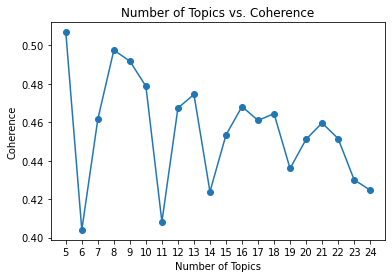

In [56]:
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.show()

In [57]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=40,\
               iterations=200,  chunksize = 10000, eval_every = None, random_state=0)

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
# To show initial topics
ldamodel.show_topics(5, num_words=10, formatted=False)

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  [('thank', 0.057472054),
   ('student', 0.024416773),
   ('love', 0.012923045),
   ('work', 0.012509593),
   ('campus', 0.012380342),
   ('state', 0.012315606),
   ('university', 0.010827422),
   ('life', 0.010572292),
   ('care', 0.008668205),
   ('proud', 0.008657206)]),
 (1,
  [('vaccine', 0.058593024),
   ('covid', 0.028130934),
   ('student', 0.02202436),
   ('time', 0.013612637),
   ('vaccinate', 0.01353474),
   ('virus', 0.013428982),
   ('world', 0.012120819),
   ('force', 0.011736558),
   ('test', 0.0115613565),
   ('mandate', 0.010474228)]),
 (2,
  [('son', 0.03978485),
   ('man', 0.022799253),
   ('today', 0.019155435),
   ('martyr', 0.01586648),
   ('story', 0.015234823),
   ('student', 0.012914103),
   ('kill', 0.0127767185),
   ('return', 0.012484404),
   ('home', 0.012408685),
   ('husband', 0.011519977)]),
 (3,
  [('student', 0.017270533),
   ('school', 0.016106818),
   ('class', 0.014437709),
   ('parent', 0.014250799),
   ('university', 0.012834191),
   ('gradu

In [150]:
!pip install pandas==1.3.1

In [59]:
topic_data =  gensimvis.prepare(ldamodel, doc_term_matrix, dictionary, mds = 'pcoa')
pyLDAvis.display(topic_data)

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
all_topics = {}
num_terms = 10 # Adjust number of words to represent each topic
lambd = 0.6 # Adjust this accordingly based on tuning above
for i in range(1,6): #Adjust this to reflect number of topics chosen for final LDA model
    topic = topic_data.topic_info[topic_data.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
display(pd.DataFrame(all_topics))

/Users/mayar/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,vaccine,parent,thank,way,son
1,covid,graduate,love,mask,man
2,vaccinate,school,student,decision,today
3,virus,class,proud,day,martyr
4,force,family,campus,stop,kill
5,mandate,congratulation,state,baylor,return
6,student,graduation,care,face,husband
7,world,university,life,price,minute
8,test,year,power,wear,story
9,vaccination,student,texas,criminal_action,bear


# Mapping Comments to Topics

In [ ]:
def topic_prediction(my_document):
    string_input = [my_document]
    X = vect.transform(string_input)
    # Convert sparse matrix to gensim corpus.
    corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
    output = list(ldamodel[corpus])[0]
    topics = sorted(output,key=lambda x:x[1],reverse=True)
    return topics[0][0]

In [ ]:
topic_prediction("blah blah blah")

# OLD LDA

In [ ]:
vect = CountVectorizer(stop_words='english')

In [ ]:
dtm=vect.fit_transform(rm_list)

In [ ]:
pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,0000225407,0003059950,00041603296889,00071133272464,001,0019,005,006,00671html,0086,01,012,0156,0156242,015761294568674,0194,02,021,0211553368,021383430329200,021450,02187,025,03,0302480009_3000,032,034075934090345,0346efunrhqy5u4z,04,044,0474,0478,05,0552471234,06,063,064,07,...,وائل,پو,ตต,ตาสอร,ทธ,ทร,ประส,พย,มฉ,ลพรภ,สร,อะนะ,เดช,ፏቷ,ἄλφα,でも大丈夫,アンネ,シェイクの近所を救う,パルミザーノ,マリシェル,中央大學,了不起,司徒雷風,實驗教育,林漢祥,陳財民,셰이크_자라_지역_구하기,𝐁𝐚𝐧𝐠𝐥𝐚𝐝𝐞𝐬𝐡𝐢,𝐁𝐫𝐎,𝐃𝐞𝐦𝐚𝐧𝐝,𝐃𝐨𝐈𝐧𝐆,𝐇𝐢𝐧𝐝𝐮𝐬,𝐎𝐟,𝐒𝐚𝐟𝐞𝐭𝐲,𝐒𝐭𝐄𝐏,𝐖𝐞,𝐘𝐨𝐮,𝐚𝐫𝐄,𝐰𝐇𝐚𝐓,𝑵𝒊𝒄𝒆
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8246,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))
    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

plot_10_most_common_words(dtm, vect)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


KeyboardInterrupt: ignored

In [ ]:
lda = LatentDirichletAllocation(n_components=5)

In [ ]:
lda_dtf = lda.fit_transform(dtm)

In [ ]:
sorting = np.argsort(lda.components_)[:,::-1]
features = np.array(vect.get_feature_names())

In [ ]:
import mglearn
mglearn.tools.print_topics(topics=range(5), feature_names=features, 
                           sorting=sorting, topics_per_chunk=5, n_words=10)

In [ ]:
rm_fall, rm_fall_tot = get_posts_by_period(rm_comp, "2020-6-1", "2020-12-31")
rm_spr, rm_spr_tot = get_posts_by_period(rm_comp, "2021-1-1", "2021-7-1")
rm_covid_fall, rm_covid_fall_tot = filter_covid_posts(rm_fall)
rm_covid_spr, rm_covid_spr_tot = filter_covid_posts(rm_spr)
print(rm_covid_fall_tot / rm_fall_tot)
print(rm_covid_spr_tot / rm_spr_tot)
rm_covid_fall = get_comments_only(rm_covid_fall)
rm_covid_spr = get_comments_only(rm_covid_spr)

ip_fall, ip_fall_tot = get_posts_by_period(ip_comp, "2020-6-1", "2020-12-31")
ip_spr, ip_spr_tot = get_posts_by_period(ip_comp, "2021-1-1", "2021-7-1")
ip_covid_fall, ip_covid_fall_tot = filter_covid_posts(ip_fall)
ip_covid_spr, ip_covid_spr_tot = filter_covid_posts(ip_spr)
print(ip_covid_fall_tot / ip_fall_tot)
print(ip_covid_spr_tot / ip_spr_tot)
ip_covid_fall = get_comments_only(ip_covid_fall)
ip_covid_spr = get_comments_only(ip_covid_spr)

hb_fall, hb_fall_tot = get_posts_by_period(hb_comp, "2020-6-1", "2020-12-31")
hb_spr, hb_spr_tot = get_posts_by_period(hb_comp, "2021-1-1", "2021-7-1")
hb_covid_fall, hb_covid_fall_tot = filter_covid_posts(hb_fall)
hb_covid_spr, hb_covid_spr_tot = filter_covid_posts(hb_spr)
print(hb_covid_fall_tot / hb_fall_tot)
print(hb_covid_spr_tot / hb_spr_tot)
hb_covid_fall = get_comments_only(hb_covid_fall)
hb_covid_spr = get_comments_only(hb_covid_spr)